In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.shape

(3999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
### Feature scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Exploratory Data Analysis (EDA)
Key EDA Insights 
Large variation in Balance, Miles, BonusMiles
Some customers are extremely high-value
Scale differences justify standardization
Datases likely contains multiple customer tiers

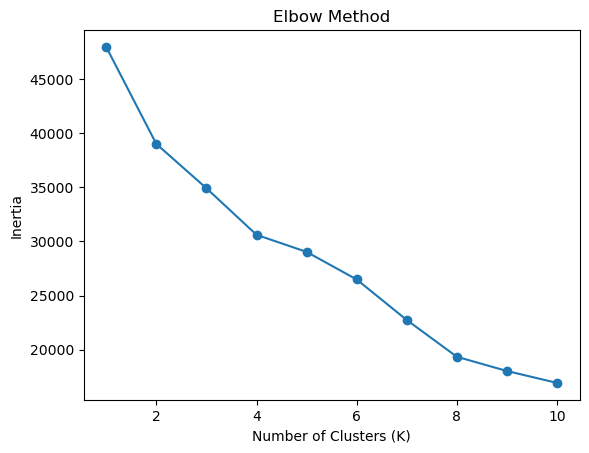

In [7]:
###K-Means Clustering
###optimal k-mean(elbow method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()   

In [9]:
###apply
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['KMeans_Cluster'] = kmeans_labels

In [10]:
### K-Means Evaluation (Silhouette Score)

from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_silhouette

0.22808887010836637

In [11]:
###DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df['DBSCAN_Cluster'] = dbscan_labels

In [12]:
###DBscan evaluation
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    dbscan_silhouette